In [1]:
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
class K_Means:

    def __init__(self, k=2, n_iterations=100):
        self.k = k
        self.n_iterations = n_iterations

    def fit(self, data):
        self.centroids = self._get_initial_centroids(data)
        self.distances = self._calculate_distance_btw_centroids_and_points(data, self.centroids)
        self.points = self._assign_data_point_to_closest_centroid(self.distances)
        self.points, self.centroids = self._update_centroid_location(data, self.points)
        #print(f'print centroids from fit - {self.centroids}')
        return self.points, self.centroids

    def _get_initial_centroids(self, data):
        random_idx = np.random.choice(len(data), self.k, replace=False)
        return data[random_idx, :]

    def _calculate_distance_btw_centroids_and_points(self, data, centroids, metric='euclidean'):
        return cdist(data, centroids, metric)

    def _assign_data_point_to_closest_centroid(self, distances):
        points = np.array([np.argmin(i) for i in distances])
        return points

    def _update_centroid_location(self, data, points):
        for _ in range(self.n_iterations):
            centroids = []
            for i in range(self.k):
                #updating centroids
                tmp_centroids = data[points == i].mean(axis=0)
                centroids.append(tmp_centroids)
            
            centroids = np.vstack(centroids)
            distances = self._calculate_distance_btw_centroids_and_points(data, centroids)
            points = self._assign_data_point_to_closest_centroid(distances)
        # print(f'final points - {points}')
        # print(f'final centroids - {centroids}')
        return points, centroids

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


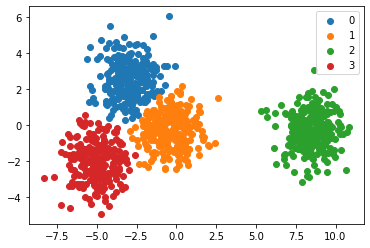

In [3]:
#test the algorithm
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, random_state=1)

pca = PCA(2)
df = pca.fit_transform(X)


kmean = K_Means(k=4,n_iterations=500)
label, centroids = kmean.fit(df)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [4]:
centroids

array([[-2.96633123,  2.53893586],
       [-0.41335881, -0.24796016],
       [ 8.47541857, -0.33593259],
       [-5.06808526, -2.09608901]])